In [1]:
import numpy as np
import pandas as pd
from textwrap import wrap
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.ticker as mticker
import sys, os
from hsbmpy import plot_topic_size, get_max_available_L

In [48]:
directory="/home/fvalle/phd/datasets/gtex/log/3000_random-5000hvg/"
os.chdir(directory)
sys.path.append('/home/fvalle/phd/master_thesis/')

In [49]:
L = get_max_available_L(directory)

In [50]:
df = pd.read_csv("mainTable.csv", index_col=[0])

# topic size

In [ ]:
for l in range(0,L+1):
    plot_topic_size(directory,l)

## Topic O

In [ ]:
df = pd.read_csv("mainTable.csv", index_col=0,header=0)

In [ ]:
df_mv=pd.DataFrame(data=[df.mean(1), df.var(1),df.apply(lambda x: len([x[x>0]])/float(len(x)), 1)], index=['average', 'var', 'O']).transpose()
df_mv.head()

In [ ]:
for l in range(0,L+1):
    fig = plt.figure(figsize=(15,8))
    ax = fig.subplots(1,2)
    candles = get_candles(directory,l,df_mv,ax[0])
    candlestick2_ohlc(ax[0], candles['open'],candles['high'],candles['low'],candles['close'],width=0.6,colordown='b')
    ax[1].hist((np.array(candles['open'])+np.array(candles['close']))/2, weights=candles['size'], range=(-0.05,1.05), bins=10, histtype='step')
    ax[1].set_xlabel("$O_i", fontsize=18)
    plt.show()
    fig.savefig("%s/topic_Ocandles_level_%d.pdf"%(directory,l))

# Geneontology

In [5]:
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol
import gseapy as gs

In [23]:
import importlib, geneontology,tableanalyser
importlib.reload(geneontology)
importlib.reload(tableanalyser)
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol

In [51]:
l=L
df_topics = pd.read_csv("%s/topsbm/topsbm_level_%d_topics.csv"%(directory,l))

In [52]:
df_symbols= pd.read_csv("https://www.genenames.org/cgi-bin/download/custom?col=gd_hgnc_id&col=gd_app_sym&col=gd_pub_ensembl_id&col=md_ensembl_id&col=md_eg_id&status=Approved&status=Entry%20Withdrawn&hgnc_dbtag=on&order_by=gd_app_sym_sort&format=text&submit=submit", index_col=[0], sep='\t')

In [53]:
def get_sea():
    for g in df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]:
        yield get_symbol(g)

In [54]:
with open("gback.txt",'w') as f:
    list(map(lambda x: f.writelines(x+'\n')if len(x)>1 else None, get_sea()))
    
with open("gback_ensg.txt",'w') as f:
    list(map(lambda x: f.writelines(x[:15]+'\n')if len(x)>1 else None, df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]))

In [55]:
gs.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CORUM',
 'Cancer_Cell_Line_Encyclopedia',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbations_from_GEO_up',
 'Disease_Signatures_from_GEO_down_2014',
 'Disease_Signatures_from_GEO_up_2014',
 'DrugMatrix',
 'Drug_Perturbations_from_GEO_2014',
 'Drug_Perturbations_from_GEO_down',
 'Drug_Perturbations_from_GEO_up',
 'EN

In [56]:
gene_sets = ['GO_Molecular_Function_2018',
             'GO_Biological_Process_2018',
             'GO_Cellular_Component_2018',
             'Human_Phenotype_Ontology',
             'WikiPathways_2019_Human',
             '/home/fvalle/MSigDB/h.all.v7.0.symbols.gmt',
             '/home/fvalle/MSigDB/c2.cp.v7.0.symbols.gmt'
            ]

In [58]:
threshhold = 5e-1
cutoff = 5e-1
background = len([g for g in get_sea()])
os.system("mkdir -p gsea")
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("gsea/gsea_level_%d_topic_%d.csv"%(l,itopic+1), index_col=[0])
        print(topic)
    except:
        try:
            gene_list = ensg_to_symbol(df_topics.loc[:,topic].dropna().values)
            print(topic)
            enriched_topic = get_ontology_df(gene_list, cutoff=cutoff, threshhold = threshhold, gene_sets = gene_sets, background=background)
            enriched_topic = enriched_topic.sort_values(by=['Adjusted P-value'], ascending=True)[:20]
            enriched_topic.to_csv("gsea/gsea_level_%d_topic_%d.csv"%(l,itopic+1))
        except:
            print(*sys.exc_info())
    print(enriched_topic)

Topic 1
<class 'requests.exceptions.ConnectionError'> ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')) <traceback object at 0x7fb2684d3208>
                                                  Term  Adjusted P-value  \
140                    muscle contraction (GO:0006936)      1.976447e-13   
141                    myofibril assembly (GO:0030239)      9.636725e-09   
142           striated muscle contraction (GO:0006941)      7.671234e-08   
143    skeletal muscle tissue development (GO:0007519)      2.129623e-06   
145  positive regulation of skeletal muscle tissue ...      2.999101e-06   
144  skeletal muscle cell differentiation (GO:0035914)      3.598921e-06   
146     actomyosin structure organization (GO:0031032)      3.763580e-06   
147  positive regulation of skeletal muscle fiber d...      8.216829e-06   
148  positive regulation of myotube differentiation...      1.083570e-05   
149  regulation of skeletal muscle fiber developmen...      1.527327e-

2020-01-21 10:52:34,483 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-21 10:52:37,036 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-01-21 10:52:37,047 Warning: No enrich terms using library CUSTOM140404267696064 when cutoff = 0.5
2020-01-21 10:52:37,125 Warning: No enrich terms using library CUSTOM140404267695272 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
84        regulation of heart contraction (GO:0008016)          0.206785   
0              myosin heavy chain binding (GO:0032036)          0.219002   
83    cardiac muscle tissue morphogenesis (GO:0055008)          0.228875   
82   ventricular cardiac muscle tissue morphogenesi...          0.256871   
85                adult heart development (GO:0007512)          0.276328   
465          smooth endoplasmic reticulum (GO:0005790)          0.311505   
81   ventricular cardiac muscle cell development (G...          0.347451   
86                    heart morphogenesis (GO:0003007)          0.348287   
80   regulation of striated muscle contraction (GO:...          0.475693   

                       Gene_set  
84   GO_Biological_Process_2018  
0    GO_Molecular_Function_2018  
83   GO_Biological_Process_2018  
82   GO_Biological_Process_2018  
85   GO_Biological_Process_2018  
465  GO_Cellular_Component_2018  
8

2020-01-21 10:52:49,635 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5


                                                   Term  Adjusted P-value  \
134      extracellular matrix organization (GO:0030198)          0.005619   
3                        cytokine activity (GO:0005125)          0.023300   
135     regulation of leukocyte chemotaxis (GO:0002688)          0.026748   
2               chemokine receptor binding (GO:0042379)          0.029089   
1          CXCR chemokine receptor binding (GO:0045236)          0.035178   
136       extracellular matrix disassembly (GO:0022617)          0.050851   
817                 tertiary granule lumen (GO:1904724)          0.053298   
1105         HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION          0.055578   
818            endoplasmic reticulum lumen (GO:0005788)          0.055583   
4         metallocarboxypeptidase activity (GO:0004181)          0.065352   
0                       chemokine activity (GO:0008009)          0.067923   
141                 granulocyte chemotaxis (GO:0071621)          0.081803   

2020-01-21 10:53:06,758 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-21 10:53:09,606 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-01-21 10:53:09,620 Warning: No enrich terms using library CUSTOM140404268481560 when cutoff = 0.5
2020-01-21 10:53:09,718 Warning: No enrich terms using library CUSTOM140404268481056 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
1         anion:anion antiporter activity (GO:0015301)          0.052035   
0                 ion antiporter activity (GO:0099516)          0.054684   
2    inorganic anion transmembrane transporter acti...          0.088016   
3    extracellular ligand-gated ion channel activit...          0.096496   
7    transmitter-gated ion channel activity involve...          0.111723   
6    anion transmembrane transporter activity (GO:0...          0.124993   
5    ligand-gated cation channel activity (GO:0099094)          0.125405   
4    acetylcholine-gated cation-selective channel a...          0.145576   
8       ligand-gated ion channel activity (GO:0015276)          0.148049   
9    organic anion transmembrane transporter activi...          0.151837   
10        acetylcholine receptor activity (GO:0015464)          0.240526   
15   urate transmembrane transporter activity (GO:0...          0.328836   
205         

2020-01-21 10:53:13,898 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-21 10:53:16,806 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-21 10:53:19,636 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-21 10:53:22,517 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-21 10:53:25,482 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-01-21 10:53:25,495 Warning: No enrich terms using library CUSTOM140404337260224 when cutoff = 0.5
2020-01-21 10:53:25,570 Warning: No enrich terms using library CUSTOM140404337260080 when cutoff = 0.5


Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 6


2020-01-21 10:53:35,010 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-21 10:53:46,773 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-21 10:53:50,507 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-01-21 10:53:50,520 Warning: No enrich terms using library CUSTOM140404337280776 when cutoff = 0.5
2020-01-21 10:53:50,660 Warning: No enrich terms using library CUSTOM140404337280920 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
206  cell wall macromolecule catabolic process (GO:...          0.142888   
754                    Golgi cis cisterna (GO:0000137)          0.213614   
753               Golgi cisterna membrane (GO:0032580)          0.427228   

                       Gene_set  
206  GO_Biological_Process_2018  
754  GO_Cellular_Component_2018  
753  GO_Cellular_Component_2018  
Topic 7
<class 'requests.exceptions.ConnectionError'> ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')) <traceback object at 0x7fb26dde0e48>
                                                  Term  Adjusted P-value  \
206  cell wall macromolecule catabolic process (GO:...          0.142888   
754                    Golgi cis cisterna (GO:0000137)          0.213614   
753               Golgi cisterna membrane (GO:0032580)          0.427228   

                       Gene_set  
206  GO_Biological_Process_2018  
754  GO_Cellular

2020-01-21 10:54:06,137 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-21 10:54:09,140 Warning: No enrich terms using library CUSTOM140404272183408 when cutoff = 0.5
2020-01-21 10:54:09,246 Warning: No enrich terms using library CUSTOM140404330797384 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
224            striated muscle contraction (GO:0006941)          0.000148   
223                     muscle contraction (GO:0006936)          0.000175   
225            skeletal muscle contraction (GO:0003009)          0.000644   
228           neutrophil mediated immunity (GO:0002446)          0.001188   
227   neutrophil activation involved in immune respo...          0.001274   
226               neutrophil degranulation (GO:0043312)          0.001422   
1487                tertiary granule lumen (GO:1904724)          0.003732   
229   positive regulation of hormone metabolic proce...          0.009417   
0                         hormone activity (GO:0005179)          0.009510   
1488                      specific granule (GO:0042581)          0.018826   
230      extracellular matrix organization (GO:0030198)          0.022362   
232   positive regulation of neutrophil chemotaxis (...          0.026783   

2020-01-21 10:54:32,122 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-21 10:54:34,830 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-21 10:54:38,491 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-21 10:54:41,151 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-21 10:54:44,142 Warning: No enrich terms using library CUSTOM140404270087336 when cutoff = 0.5
2020-01-21 10:54:44,201 Warning: No enrich terms using library CUSTOM140404270084456 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
507                          Estrogen metabolism WP697          0.288151   
506                  Oxidation by Cytochrome P450 WP43          0.329861   
505                   Fatty Acid Omega Oxidation WP206          0.332554   
504  Metapathway biotransformation Phase I and II W...          0.370610   
508                              Glucuronidation WP698          0.498039   

                    Gene_set  
507  WikiPathways_2019_Human  
506  WikiPathways_2019_Human  
505  WikiPathways_2019_Human  
504  WikiPathways_2019_Human  
508  WikiPathways_2019_Human  
Topic 11


2020-01-21 10:55:03,964 Warning: No enrich terms using library CUSTOM140404356193808 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
2327                            REACTOME_KERATINIZATION      3.226313e-42   
2279       REACTOME_FORMATION_OF_THE_CORNIFIED_ENVELOPE      4.420064e-08   
279           keratinocyte differentiation (GO:0030216)      4.072615e-07   
278                  peptide cross-linking (GO:0018149)      4.540636e-07   
1877                  Vitamin D Receptor Pathway WP2877      5.836076e-07   
280         epidermal cell differentiation (GO:0009913)      1.661904e-06   
0         endopeptidase inhibitor activity (GO:0004866)      2.923581e-06   
1430                           Golgi lumen (GO:0005796)      9.928046e-06   
282                       skin development (GO:0043588)      1.267368e-05   
284   negative regulation of endopeptidase activity ...      1.332174e-05   
281                        anion transport (GO:0006820)      1.464664e-05   
283          glucuronate metabolic process (GO:0019585)      1.529362e-05   

2020-01-21 10:55:20,834 Warning: No enrich terms using library CUSTOM140404278187136 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
105                 epidermis development (GO:0008544)      2.812702e-26   
106        epidermal cell differentiation (GO:0009913)      5.329921e-23   
107          keratinocyte differentiation (GO:0030216)      1.717481e-22   
820       REACTOME_FORMATION_OF_THE_CORNIFIED_ENVELOPE      5.894046e-21   
108                      skin development (GO:0043588)      3.433348e-20   
109                 peptide cross-linking (GO:0018149)      6.247982e-19   
838                            REACTOME_KERATINIZATION      8.563206e-14   
515              Palmoplantar keratoderma (HP:0000982)      9.871755e-07   
516             Abnormality of nail color (HP:0100643)      4.798167e-06   
471    intermediate filament cytoskeleton (GO:0045111)      1.032274e-05   
0    serine-type endopeptidase inhibitor activity (...      9.983807e-05   
472                 intermediate filament (GO:0005882)      1.296384e-04   
517         

2020-01-21 10:55:37,728 Warning: No enrich terms using library CUSTOM140404267706336 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
140                    muscle contraction (GO:0006936)      1.976447e-13   
141                    myofibril assembly (GO:0030239)      9.636725e-09   
142           striated muscle contraction (GO:0006941)      7.671234e-08   
143    skeletal muscle tissue development (GO:0007519)      2.129623e-06   
145  positive regulation of skeletal muscle tissue ...      2.999101e-06   
144  skeletal muscle cell differentiation (GO:0035914)      3.598921e-06   
146     actomyosin structure organization (GO:0031032)      3.763580e-06   
147  positive regulation of skeletal muscle fiber d...      8.216829e-06   
148  positive regulation of myotube differentiation...      1.083570e-05   
149  regulation of skeletal muscle fiber developmen...      1.527327e-05   
803         striated muscle thin filament (GO:0005865)      2.239389e-05   
151         actin-myosin filament sliding (GO:0033275)      2.453684e-05   
152      str

2020-01-21 10:55:40,920 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-21 10:55:43,509 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-21 10:55:45,970 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-21 10:55:48,459 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-21 10:55:51,093 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                 Term  Adjusted P-value  \
19                              BIOCARTA_SLRP_PATHWAY          0.017975   
23  REACTOME_DEFECTIVE_B4GALT1_CAUSES_B4GALT1_CDG_...          0.017975   
24              REACTOME_DEFECTIVE_CHST6_CAUSES_MCDC1          0.017975   
25  REACTOME_DEFECTIVE_ST3GAL3_CAUSES_MCT12_AND_EI...          0.017975   
31               REACTOME_KERATAN_SULFATE_DEGRADATION          0.023344   
22                                 NABA_PROTEOGLYCANS          0.039108   
30              REACTOME_KERATAN_SULFATE_BIOSYNTHESIS          0.039108   
32        REACTOME_KERATAN_SULFATE_KERATIN_METABOLISM          0.039108   
27  REACTOME_DISEASES_ASSOCIATED_WITH_GLYCOSAMINOG...          0.040673   
29              REACTOME_GLYCOSAMINOGLYCAN_METABOLISM          0.108876   
28                 REACTOME_DISEASES_OF_GLYCOSYLATION          0.113708   
20                                NABA_CORE_MATRISOME          0.191228   
33               REACTOME

In [ ]:
topic_pvalues = []
topic_gos = []
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("%s/gsea/gsea_level_%d_topic_%d.csv"%(directory,l,itopic+1))
        if len(enriched_topic.index) >0:
            p_val = np.sort(enriched_topic['Adjusted P-value'])[0]
            topic_pvalues.append(-np.log10(p_val))
            for goc in enriched_topic['Gene_set'][:10].unique():
                topic_gos.append(goc)
        print(topic)
    except:
        print("error", sys.exc_info()[0])

In [ ]:
fig = plt.figure()
x = np.arange(1,1+len(topic_pvalues))
c, _, _ = plt.hist(topic_pvalues, histtype='step', lw=2)
plt.plot([-np.log10(0.05) for _ in np.linspace(1,10,num=10)],np.arange(0,np.max(c)+5,(np.max(c)+5)/10), ls='--', lw=5, label="$\\alpha=0.05$")
plt.xlabel('-log(P-value)', fontsize=16)
plt.ylabel("number of topics")
#plt.ylim(0,0.055)
#plt.yscale('log')
plt.legend(fontsize=16)
fig.savefig("%s/pvaluescrosstopic(%d).png"%(directory,l))

In [ ]:
fig = plt.figure(figsize=(20,10))
gos, goscounts = np.unique(topic_gos,return_counts=True)
plt.barh(["\n".join(wrap(str(l).replace('_',' '),20)) for l in gos], goscounts)
plt.yticks(fontsize=15)
plt.show()
fig.savefig("%s/pvaluecategories(%d).pdf"%(directory,l))

# WGCNA vs hSBM

In [112]:
hsbm_list = pd.read_csv("topsbm/topsbm_level_3_word-dist.csv", index_col=0).apply(pd.Series.idxmax,axis=1)
hsbm_list.index = [g[:15] for g in hsbm_list.index]
hsbm_list

ENSG00000268903    Topic 1
ENSG00000269981    Topic 1
ENSG00000225972    Topic 1
ENSG00000229344    Topic 1
ENSG00000198744    Topic 1
                    ...   
ENSG00000210176    Topic 1
ENSG00000210184    Topic 1
ENSG00000210191    Topic 1
ENSG00000210195    Topic 1
ENSG00000210196    Topic 9
Length: 5000, dtype: object

In [113]:
wgcna_list = pd.read_csv("wgcna/wgcna_level_0_word-dist.csv", index_col=0).apply(pd.Series.idxmax,axis=1)

In [114]:
df_cmap=pd.DataFrame(index=hsbm_list.unique(), columns=wgcna_list.unique()).fillna(0)

In [115]:
for g in wgcna_list.index:
    if g in hsbm_list:
        df_cmap.at[hsbm_list[g],wgcna_list[g]]+=1

In [116]:
import seaborn as sns

<Figure size 432x288 with 0 Axes>

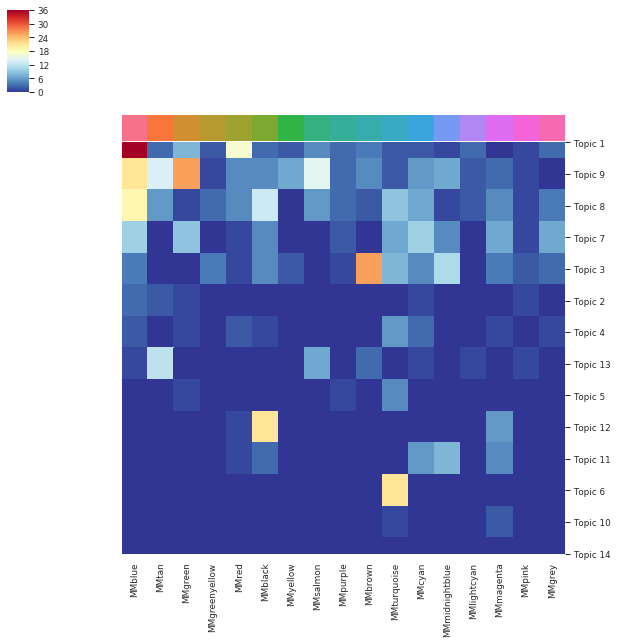

In [117]:
df_cmap = df_cmap.sort_values(by=[c for c in df_cmap.columns], axis=0, ascending=False)
#create a color palette with the same number of colors as unique values in the Source column
network_pal = sns.color_palette('husl',n_colors=len(df_cmap.columns))

#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut = dict(zip(df_cmap.columns, network_pal))
network_col = df_cmap.columns.map(network_lut)
#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut = dict(zip(df_cmap.columns, network_pal))
network_col = df_cmap.columns.map(network_lut)

fig = plt.figure()
cm = sns.clustermap(df_cmap, row_cluster=False, col_cluster=False, metric='euclidean', vmin=0, cmap='RdYlBu_r', col_colors=network_col)
cm.fig.savefig("%s/topics.pdf"%(directory))

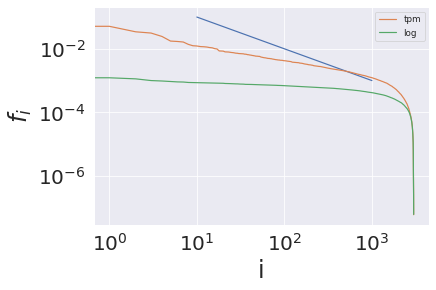

In [163]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.logspace(1,3), 1./np.logspace(1,3))
#f_log = df.sum(axis=1).divide(df.sum(axis=1).sum()).sort_values(ascending=False).values
#f = df.applymap(lambda y: np.power(2,y)-1).sum(axis=1).divide(df.sum(axis=1).sum()).sort_values(ascending=False).values
ax.plot(f, label='tpm')
ax.plot(f_log, label='log')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.set_xlabel('i', fontsize=24)
ax.set_ylabel('$f_i$', fontsize=24)
#ax.set_ylim(1e-3,1e-2)
ax.legend()
plt.show()
fig.savefig("log_zipf.pdf")